## Gautam Mishra - Handling all the missing value from dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Numpy-Numerical Python that Deals with numbers.

Pandas-Used to analyse data.It has functions for analyzing,cleaning,exploring and manipulating Data.

Matplotlib-comprehensive library for creating static, animated, and interactive visualizations.

Seaborn-Seaborn is a Python data visualization library based on matplotlib. It provides a high-level
interface for drawing attractive and informative statistical graphics.

Warnings are provided to warn the developer of situations that aren’t necessarily exceptions
and ignore them.

In [2]:
df=pd.read_csv('data2.csv')

By this method we can read the csv file and store it in df variable.

In [3]:
df

,Name,Python,Machine Learning,Age,AI,NLP,Cv
0,jay,90,?,23,90,?,23
1,raj,missing,89,NaN,missing,89,NaN
2,kumar,78,78,?,78,78,?
3,suraj,NaN,NaN,missing,NaN,NaN,missing
4,pawan,missing,NaN,21,missing,NaN,21
5,viraj,65,56,22,65,56,22
6,vijay,45,67,?,45,67,?
7,sumit,80,45,24,80,45,24
8,akash,70,67,missing,70,67,missing
9,sujit,NaN,NaN,22,NaN,NaN,22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Name                10 non-null object
Python              8 non-null object
Machine Learning    7 non-null object
Age                 9 non-null object
AI                  8 non-null object
NLP                 7 non-null object
Cv                  9 non-null object
dtypes: object(7)
memory usage: 688.0+ bytes


This dataset contains 7 object columns with 10 rows.
The null 2 null value in Python column, 3 in Machine Learning column,1 in age column,2 in AI column,3 in NLP and 1 in Cv.

In [5]:
for i in df:
    print(df[i].unique())

['jay' 'raj' 'kumar' 'suraj' 'pawan' 'viraj' 'vijay' 'sumit' 'akash'
 'sujit']
['90' 'missing' '78' nan '65' '45' '80' '70']
['?' '89' '78' nan '56' '67' '45']
['23' nan '?' 'missing' '21' '22' '24']
['90' 'missing' '78' nan '65' '45' '80' '70']
['?' '89' '78' nan '56' '67' '45']
['23' nan '?' 'missing' '21' '22' '24']


Iterating through all columns unique value, there are other garbage values like 'missing' and '?'

In [6]:
for i in df:
    df[i]=df[i].replace('missing',np.nan)
    df[i]=df[i].replace('?',np.nan)

While iterating through the dataframe, Replacing all the 'missing' and '?' with np.nan. 

In [7]:
df.isnull().sum()

Name                0
Python              4
Machine Learning    4
Age                 5
AI                  4
NLP                 4
Cv                  5
dtype: int64

Now our data consist 4 null values in Python column, 4 in Machine Learning column,5 in age column,4 in AI column,4 in NLP and 5 in Cv.

In [8]:
df.isnull().sum()/len(df)*100

Name                 0.0
Python              40.0
Machine Learning    40.0
Age                 50.0
AI                  40.0
NLP                 40.0
Cv                  50.0
dtype: float64

In [9]:
for i in df.loc[:,'Python':'Cv']:
    df[i]=df[i].astype('float')

Changing the datatypes of all other columns to float except name column.

In [10]:
df.dtypes

Name                 object
Python              float64
Machine Learning    float64
Age                 float64
AI                  float64
NLP                 float64
Cv                  float64
dtype: object

In [11]:
df.describe()

,Python,Machine Learning,Age,AI,NLP,Cv
count,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000
mean,71.333333,67.000000,22.400000,71.333333,67.000000,22.400000
std,15.513435,15.556349,1.140175,15.513435,15.556349,1.140175
min,45.000000,45.000000,21.000000,45.000000,45.000000,21.000000
25%,66.250000,58.750000,22.000000,66.250000,58.750000,22.000000
50%,74.000000,67.000000,22.000000,74.000000,67.000000,22.000000
75%,79.500000,75.250000,23.000000,79.500000,75.250000,23.000000
max,90.000000,89.000000,24.000000,90.000000,89.000000,24.000000


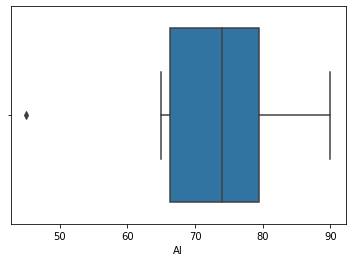

In [12]:
sns.boxplot(df['AI'])

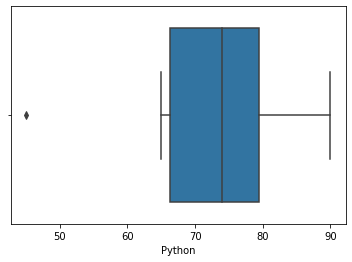

In [13]:
sns.boxplot(df['Python'])

As there are outlier in column 'Python' and 'AI' we are going to fill the null values using median of  these columns.

In [14]:
for i in df.loc[:,'Machine Learning':'Age']:
    df[i]=df[i].fillna(df[i].mean())

Filing the 'Machine Learning' and 'Age' columns missing value with mean values.

In [15]:
for i in df.loc[:,'NLP':'Cv']:
    df[i]=df[i].fillna(df[i].mean())

Filing the 'NLP' and 'Cv' columns missing value with mean values.

In [16]:
df['Python']=df['Python'].fillna(df['Python'].median())

In [17]:
df['AI']=df['AI'].fillna(df['AI'].median())

Filling the 'Python' and 'AI' column using median().

In [18]:
df

,Name,Python,Machine Learning,Age,AI,NLP,Cv
0,jay,90.0,67.0,23.0,90.0,67.0,23.0
1,raj,74.0,89.0,22.4,74.0,89.0,22.4
2,kumar,78.0,78.0,22.4,78.0,78.0,22.4
3,suraj,74.0,67.0,22.4,74.0,67.0,22.4
4,pawan,74.0,67.0,21.0,74.0,67.0,21.0
5,viraj,65.0,56.0,22.0,65.0,56.0,22.0
6,vijay,45.0,67.0,22.4,45.0,67.0,22.4
7,sumit,80.0,45.0,24.0,80.0,45.0,24.0
8,akash,70.0,67.0,22.4,70.0,67.0,22.4
9,sujit,74.0,67.0,22.0,74.0,67.0,22.0


There are no null value left in our table.

In [19]:
df.isna().sum()

Name                0
Python              0
Machine Learning    0
Age                 0
AI                  0
NLP                 0
Cv                  0
dtype: int64

In [20]:
for i in df.loc[:,'Python':'Cv']:
    df[i]=df[i].astype('int')

In [21]:
df

,Name,Python,Machine Learning,Age,AI,NLP,Cv
0,jay,90,67,23,90,67,23
1,raj,74,89,22,74,89,22
2,kumar,78,78,22,78,78,22
3,suraj,74,67,22,74,67,22
4,pawan,74,67,21,74,67,21
5,viraj,65,56,22,65,56,22
6,vijay,45,67,22,45,67,22
7,sumit,80,45,24,80,45,24
8,akash,70,67,22,70,67,22
9,sujit,74,67,22,74,67,22
